In [1]:
import numpy as np
from os import listdir
import pandas as pd
import os

In [2]:
data_path = "C://Users//acer//Desktop//New Researchers//Kaggle//Tomato//data.csv"

In [3]:
data_raw = pd.read_csv(data_path)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 18345
Number of columns in data = 12290


**Sample data:**


,Unnamed: 0,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,...,Pixel 12279,Pixel 12280,Pixel 12281,Pixel 12282,Pixel 12283,Pixel 12284,Pixel 12285,Pixel 12286,Pixel 12287,Category
0,0,148,148,154,149,149,155,144,144,150,...,112,110,116,109,107,113,113,111,117,0.0
1,1,107,108,118,108,109,119,111,112,122,...,164,163,165,165,164,166,164,163,165,0.0
2,2,115,118,122,103,106,110,114,117,121,...,163,161,160,162,160,159,160,158,157,0.0
3,3,160,159,161,157,156,158,160,159,161,...,118,119,123,121,122,126,124,125,129,0.0
4,4,163,163,169,163,163,169,159,159,165,...,111,111,123,113,113,125,110,110,122,0.0


In [4]:
df = data_raw.drop('Unnamed: 0',axis =1)

In [5]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 12279,Pixel 12280,Pixel 12281,Pixel 12282,Pixel 12283,Pixel 12284,Pixel 12285,Pixel 12286,Pixel 12287,Category
5801,125,132,121,136,143,132,139,146,135,114,...,88,133,94,64,117,75,44,109,71,3.0
15057,173,160,168,178,165,173,178,165,173,170,...,111,96,110,123,108,122,120,105,119,8.0
2088,185,189,194,188,192,197,175,179,184,180,...,123,125,136,121,123,134,118,120,131,1.0
5033,149,143,148,141,135,140,142,136,141,151,...,111,106,105,95,90,89,100,95,94,2.0
8819,136,136,152,144,144,160,152,152,168,149,...,139,139,153,135,135,149,136,136,150,4.0


In [6]:
y = df['Category']
X = df.drop('Category',axis =1)

In [7]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0) 

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
model_nb = GaussianNB()

In [10]:
clg=model_nb.fit(X_train, y_train)

In [11]:
pred = clg.predict(X_test)

In [12]:
mat = confusion_matrix(y_test, pred)

In [13]:
mat

array([[273,   6,   2,   7,   6,   9,   2,   0,   0,  28],
       [ 57, 136,   2,  31,  23,  18,  31,  35,   8,  28],
       [ 56,  18,  54,  37,  82,  31,  73,   0,  37,   0],
       [ 27,  41,  25,  75,  92,  30,  12,  32,  22,  11],
       [ 29,  13,   6,  23, 175,  68,  47,   4,   3,  12],
       [ 23,  12,   8,   9,  45, 158,  37,   9,  16,  29],
       [ 17,  41,   4,   7,  13,  41, 197,   2,   3,  11],
       [ 31,  58,  17,  36,  20,  37, 114,  10,  70,   0],
       [ 32,   4,   1,  12, 133,  33,  50,   0, 104,   7],
       [ 62,  22,   1,  10,   3,  20,  39,   2,   0, 222]], dtype=int64)

In [16]:
acc=accuracy_score(y_test,pred)

print ('Accuracy: {:.4%}'.format(acc))

Accuracy: 38.2666%


In [23]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [19]:
train_predictions_p = clg.predict_proba(X_test)
ll = log_loss(y_test, train_predictions_p)

In [20]:
print ('Log Loss: {:.6}'.format(ll))

Log Loss: 21.1405


In [21]:
pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9
0,273,6,2,7,6,9,2,0,0,28
1,57,136,2,31,23,18,31,35,8,28
2,56,18,54,37,82,31,73,0,37,0
3,27,41,25,75,92,30,12,32,22,11
4,29,13,6,23,175,68,47,4,3,12
5,23,12,8,9,45,158,37,9,16,29
6,17,41,4,7,13,41,197,2,3,11
7,31,58,17,36,20,37,114,10,70,0
8,32,4,1,12,133,33,50,0,104,7
9,62,22,1,10,3,20,39,2,0,222


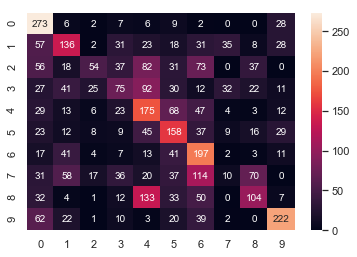

In [26]:
ax = sns.heatmap(mat, annot=True, fmt="d")

In [29]:
from sklearn.model_selection import train_test_split as tts,GridSearchCV
from sklearn import svm

In [30]:
svm1 = svm.SVC(gamma='scale',probability=True)

In [ ]:
svm1.fit(X_train, y_train)

In [ ]:
Y_testp_svm=svm1.predict(X_test)
Y_trainp_svm=svm1.predict(X_train)
Y_testp_proba_svm=svm1.predict_proba(X_test)
Y_trainp_proba_svm=svm1.predict_proba(X_train)

In [ ]:
test_accuracy=np.sum(np.array(Y_test1)==Y_testp_svm)/len(Y_testp)
train_accuracy=np.sum(np.array(Y_train1)==Y_trainp_svm)/len(Y_trainp)
print('SVM ',train_accuracy,test_accuracy)